In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sparse
from sklearn.metrics import mean_squared_error
import os
import sys
import pickle
import itertools
import matplotlib.pyplot as plt

sys.path.append('../Models')
sys.path.append('../')

import wrmf, wrmf_helpers
from settings import PATH_TO_SPARSE_MATRIX

## Get the song factorization 

In [2]:
with open('../Models/wrmf_song_factors.pickle', 'rb') as f:
    song_factors = pickle.load(f)
    
with open('../Models/wrmf_playlist_factors.pickle', 'rb') as f:
    playlist_factors = pickle.load(f)

print(song_factors.shape)
print(playlist_factors.shape)

(1610661, 20)
(500000, 20)


# Compute percentages of playlists returned for 3 stage 1 models

In [3]:
test_playlists = []
for i in range(500, 510):
    filename = f'/Users/mabasta/Desktop/CS109a/playlist-generation/data/Songs/songs{i}.csv'
    cols_ignore = ['pos', 'artist_name', 'artist_uri', 'track_name', 'album_uri', 'duration_ms', 'album_name']
    df = pd.read_csv(filename).drop(columns = cols_ignore)
    test_playlists.extend([group.track_uri for _, group in df.groupby('pid')])

_, tid_to_idx, _, _, _ = wrmf_helpers.get_user_item_sparse_matrix(PATH_TO_SPARSE_MATRIX)    

In [4]:
# """
# Use precomputed results from data/viz_data
# """  
    
# output_sizes = [500, 1000, 5000, 10000, 15000, 20000, 30000]
# song_to_song = {size: [] for size in output_sizes}
# playlist_to_song = {size: [] for size in output_sizes}
# ensemble = {size: [] for size in output_sizes}

# for i, test_playlist in enumerate(test_playlists[:30]):
#     test_playlist = test_playlist.str.replace('spotify:track:', '')
#     n = len(test_playlist)
#     test_playlist_set = set(test_playlist)
#     seed_ids = []
#     while len(seed_ids) < 2:
#         rand =list(test_playlist.sample(n=1))[0]
#         if rand in tid_to_idx:
#             seed_ids.append(rand)
#     for output_size in output_sizes:
#         print(i, output_size)
#         song_to_song_matches = wrmf_helpers.get_top_similar_from_tracks(
#             song_factors,
#             seed_ids,
#             n_similar=output_size,
#             verbose=False
#         )
#         song_to_song[output_size].append(len(test_playlist_set.intersection(set(song_to_song_matches)))/n)

#         playlist_to_song_matches = wrmf_helpers.get_top_similar_from_playlists(
#             song_factors,
#             playlist_factors,
#             seed_ids,
#             n_similar_songs=output_size,
#             n_similar_playlists=200
#         )
#         playlist_to_song[output_size].append(len(test_playlist_set.intersection(set(playlist_to_song_matches)))/n)

#         ensemble_matches = wrmf_helpers.get_top_similar_from_ensemble(
#             song_factors,
#             playlist_factors,
#             seed_ids,
#             n_similar_songs=output_size,
#             n_similar_playlists=200
#         )
#         ensemble[output_size].append(len(test_playlist_set.intersection(set(ensemble_matches)))/n)

# with open('../data/viz_data/song_to_song_test_results.pickle', 'wb') as fd:
#     pickle.dump(song_to_song, fd)

# with open('../data/viz_data/playlist_to_song_test_results.pickle', 'wb') as fd:
#     pickle.dump(playlist_to_song, fd)

# with open('../data/viz_data/ensemble_test_results.pickle', 'wb') as fd:
#     pickle.dump(ensemble, fd)

In [5]:
output_sizes = [500, 1000, 5000, 10000, 15000, 20000, 30000]

with open('../data/viz_data/song_to_song_test_results.pickle', 'rb') as f:
    song_to_song = pickle.load(f)
    
with open('../data/viz_data/playlist_to_song_test_results.pickle', 'rb') as f:
    playlist_to_song = pickle.load(f)
    
with open('../data/viz_data/ensemble_test_results.pickle', 'rb') as f:
    ensemble = pickle.load(f)

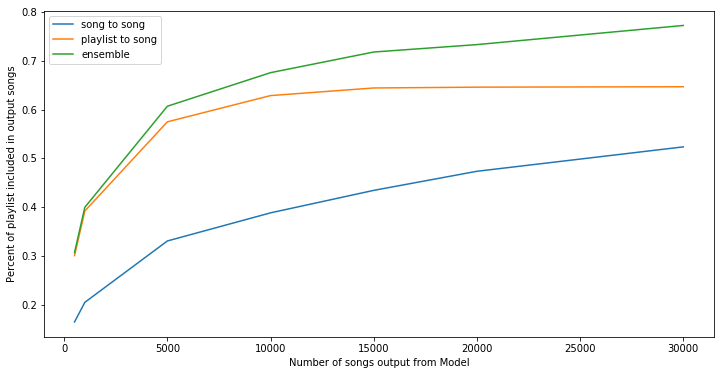

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
x = output_sizes
ax.plot(x, [np.array(v).mean() for v in song_to_song.values()], label='song to song')
ax.plot(x, [np.array(v).mean() for v in playlist_to_song.values()], label='playlist to song')
ax.plot(x, [np.array(v).mean() for v in ensemble.values()], label='ensemble')
ax.legend()

ax.set_xlabel("Number of songs output from Model")
ax.set_ylabel("Percent of playlist included in output songs")

plt.show()

# Compute average "clicks"

In [7]:
"""
Use precomputed results from data/viz_data
"""   

# song_to_song_clicks = []
# playlist_to_song_clicks = []
# ensemble_clicks = []

# for i, test_playlist in enumerate(test_playlists[:50]):
#     print(i)
#     test_playlist = test_playlist.str.replace('spotify:track:', '')
#     test_playlist_set = set(test_playlist)
#     seed_ids = []
#     while len(seed_ids) < 2:
#         rand =list(test_playlist.sample(n=1))[0]
#         if rand in tid_to_idx:
#             seed_ids.append(rand)

#     song_to_song_matches = wrmf_helpers.get_top_similar_from_tracks(
#         song_factors,
#         seed_ids,
#         n_similar=20000,
#         verbose=False
#     )
#     clicks = float("inf")
#     for i, idx in enumerate(np.arange(0, 20000, 10)):
#         song_to_song_set = set(song_to_song_matches[idx:idx+10])
#         if seed_ids[0] in song_to_song_set:
#             song_to_song_set.remove(seed_ids[0])
#         if seed_ids[1] in song_to_song_set:
#             song_to_song_set.remove(seed_ids[1])
#         overlaps = test_playlist_set.intersection(song_to_song_set)
#         if overlaps:
#             clicks = i
#             break
#     song_to_song_clicks.append(clicks) 
                
                
#     playlist_to_song_matches = wrmf_helpers.get_top_similar_from_playlists(
#         song_factors,
#         playlist_factors,
#         seed_ids,
#         n_similar_songs=20000,
#         n_similar_playlists=200
#     )
#     clicks = float("inf")
#     for i, idx in enumerate(np.arange(0, 20000, 10)):
#         playlist_to_song_set = set(playlist_to_song_matches[idx:idx+10])
#         if seed_ids[0] in playlist_to_song_set:
#             playlist_to_song_set.remove(seed_ids[0])
#         if seed_ids[1] in playlist_to_song_set:
#             playlist_to_song_set.remove(seed_ids[1])
#         overlaps = test_playlist_set.intersection(playlist_to_song_set)
#         if overlaps:
#             clicks = i
#             break
#     playlist_to_song_clicks.append(clicks)
    
#     ensemble_matches = wrmf_helpers.get_top_similar_from_ensemble(
#         song_factors,
#         playlist_factors,
#         seed_ids,
#         n_similar_songs=20000,
#         n_similar_playlists=200
#     )
#     clicks = float("inf")
#     for i, idx in enumerate(np.arange(0, 20000, 10)):
#         ensemble_set = set(ensemble_matches[idx:idx+10])
#         if seed_ids[0] in ensemble_set:
#             ensemble_set.remove(seed_ids[0])
#         if seed_ids[1] in ensemble_set:
#             ensemble_set.remove(seed_ids[1])
#         overlaps = test_playlist_set.intersection(ensemble_set)
#         if overlaps:
#             clicks = i
#             break
#     ensemble_clicks.append(clicks)

# with open('../data/viz_data/wrmf_songclick_results.pickle', 'wb') as fd:
#     pickle.dump((song_to_song_clicks, playlist_to_song_clicks, ensemble_clicks), fd)

'\nUse precomputed results from data/viz_data\n'

In [8]:
with open('../data/viz_data/wrmf_songclick_results.pickle', 'rb') as fd:
    song_to_song_clicks, playlist_to_song_clicks, ensemble_clicks = pickle.load(fd)

Average clicks for song to song: 35.42857142857143
Median clicks for song to song: 0.0


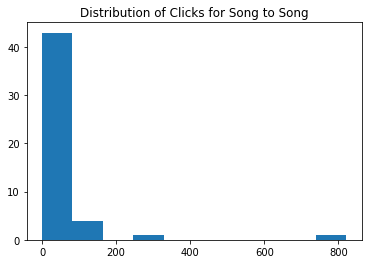

In [9]:
song_to_song_clicks = pd.Series(song_to_song_clicks).replace([np.inf, -np.inf], np.nan).dropna()
print(f"Average clicks for song to song: {song_to_song_clicks.mean()}")
print(f"Median clicks for song to song: {song_to_song_clicks.median()}")
plt.hist(song_to_song_clicks)
plt.title("Distribution of Clicks for Song to Song")
plt.show()

Average clicks for playlist to song: 1247.68
Median clicks for playlist to song: 1220.0


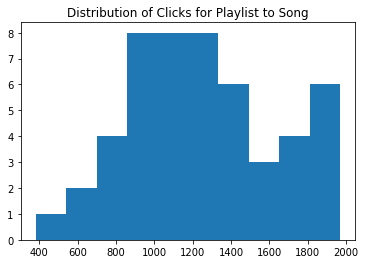

In [10]:
playlist_to_song_clicks = pd.Series(playlist_to_song_clicks).replace([np.inf, -np.inf], np.nan).dropna()
print(f"Average clicks for playlist to song: {playlist_to_song_clicks.mean()}")
print(f"Median clicks for playlist to song: {playlist_to_song_clicks.median()}")
plt.hist(playlist_to_song_clicks)
plt.title("Distribution of Clicks for Playlist to Song")
plt.show()

Average clicks for ensemble: 634.56
Median clicks for ensemble: 461.0


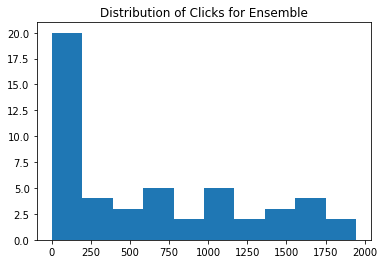

In [11]:
ensemble_clicks = pd.Series(ensemble_clicks).replace([np.inf, -np.inf], np.nan).dropna()
print(f"Average clicks for ensemble: {ensemble_clicks.mean()}")
print(f"Median clicks for ensemble: {ensemble_clicks.median()}")
plt.hist(ensemble_clicks)
plt.title("Distribution of Clicks for Ensemble")
plt.show()